In [1]:
!pip install ../ --upgrade

Processing /Users/aoife/Library/Mobile Documents/com~apple~CloudDocs/PHD/Libraries/Pythogen
  Preparing metadata (setup.py) ... done
  Created wheel for Pythogen: filename=Pythogen-0.6a0-py3-none-any.whl size=9682 sha256=a389dea1f6d1aa73a9d682002709643e36830981c4c8d2ed4b900bea4e924b09
  Stored in directory: /private/var/folders/m9/ry0lht_x4fz2fny1hvlxk2zc0000gn/T/pip-ephem-wheel-cache-m26r5lkn/wheels/b5/48/87/bed3669c0e313205bd622c19440b653293f80c03c2eb22c30f
Successfully built Pythogen
  Attempting uninstall: Pythogen
    Found existing installation: Pythogen 0.6a0
    Uninstalling Pythogen-0.6a0:
      Successfully uninstalled Pythogen-0.6a0


In [2]:
import numpy as np
from time import time 
from Pythogen import cells, model, signals

tstart = time()

meanCellRadius, meanPDRadius = 25, 5e-3

cell_params = cells.Cells(meanCellRadius, meanPDRadius, cellSizeGradientPC=0.5)

defSignal = signals.Signal(300, 0, 'defenceSignal')


def init_func(signal, G, names):
    idx = np.random.randint(G.number_of_nodes())
    G.nodes(data=True)[idx]['defenceSignal'] = 1


defSignal.add_onAdd_function(init_func)

mdl = model.Model('rectangle', NCellsY=25, NCellsX=25)
mdl.add_cell_features(cell_params)
mdl.add_signal(defSignal)

mdl.run(100)

df = mdl.to_pd()
print(df.sort_values(by='defenceSignal', ascending=False).head())

print(f"Took: {time()-tstart} s to run")

     x   y            neighbours num_neighbours distCentre     radius  \
136  5  11  [111, 135, 161, 137]              4          8  30.729167   
137  5  12  [112, 136, 162, 138]              4          7      31.25   
111  4  11   [86, 110, 136, 112]              4          9  30.729167   
161  6  11  [136, 160, 186, 162]              4          7  30.729167   
135  5  10  [110, 134, 160, 136]              4          9  30.208333   

    radius_ep_original radius_ep  num_pd defenceSignal      Deff      shape  
136              0.005     0.005  1000.0      0.121926  7.710558  rectangle  
137              0.005     0.005  1000.0      0.077404  7.582991  rectangle  
111              0.005     0.005  1000.0      0.077332  7.710558  rectangle  
161              0.005     0.005  1000.0      0.077332  7.710558  rectangle  
135              0.005     0.005  1000.0      0.074951   7.84249  rectangle  
Took: 2.0091869831085205 s to run


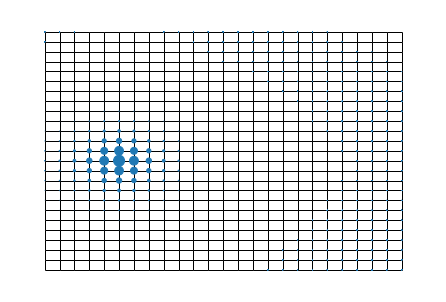

In [3]:
from Pythogen.draw import plot_network

plot_network(mdl, "defenceSignal")

In [4]:
df['defenceSignal'].sum()

0.9999999999999999